# Using VICTOR to solve volcano science problems

This notebook is intended to:

1. Provide some insights into the pitfalls in correlation

2. Provide more examples of manipulating data with pandas, including the use of scatter plots and scatter matrix 

## Notebook  3b: Pitfalls in correlation
#### version 0, Nov 11, 2022

### Background
Calculating the correlation coefficient is simple, but there are pitfalls to the calculation using real-world data that one needs to be aware of. Pitfalls include

0. data ordering may create correlation
1. occurrence of outliers (the King Kong effect!)
2. clustering of data points
3. nonlinear trends
4. closed vs. open datasets

Be aware of these issues and avoid spurious correlations!

## Data ordering
Consider a series of measurements of rock samples (pumice fragments, but it could be anything!). The measurements are made of the $a$-axis, the longest linear dimension of the sample, the $b$-axis, the next longest dimension orthogonal to $a$, and the $c$-axis, the length of the rock sample orthogonal to both $a$ and $b$. 

Because these measurements are ordered, there will always be some positive correlation among the axes. That is $r > 0$. This is an example of induced correlation.

In [1]:
import pandas as pd

#rock dimensions in cm
rock_a = pd.Series([8,16,12,13,16,14,16,11,15,13])
rock_b = pd.Series([7,8,10,12,14,9,13,6,9,10])
rock_c = pd.Series([3,5,9,5,5,8,13,3,9,9])

xyz = pd.DataFrame({'a-axis': rock_a, 'b-axis': rock_b, 'c-axis': rock_c})

xyz


,a-axis,b-axis,c-axis
0,8,7,3
1,16,8,5
2,12,10,9
3,13,12,5
4,16,14,5
5,14,9,8
6,16,13,13
7,11,6,3
8,15,9,9
9,13,10,9


array([[<AxesSubplot:xlabel='a-axis', ylabel='a-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='a-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='a-axis'>],
       [<AxesSubplot:xlabel='a-axis', ylabel='b-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='b-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='b-axis'>],
       [<AxesSubplot:xlabel='a-axis', ylabel='c-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='c-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='c-axis'>]], dtype=object)

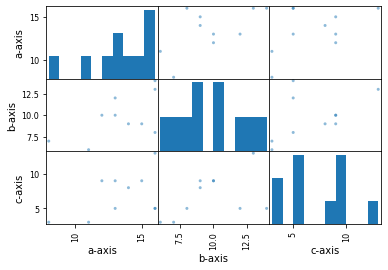

In [2]:
#plot the data
pd.plotting.scatter_matrix(xyz)

In [3]:
#calculate the pearson correlation coefficient
correlation_matrix = xyz.corr()

#print the correlation matrix
correlation_matrix

,a-axis,b-axis,c-axis
a-axis,1.000000,0.596680,0.499281
b-axis,0.596680,1.000000,0.467679
c-axis,0.499281,0.467679,1.000000


## King Kong Effect

Now consider an additional measurement of rock size - a really large rock is sampled. The giant rock is added to the dataset, and induces very high correlations. These correlation coefficients are not meaningful because the new sample (the really big rock) is an outlier.

In [4]:
#rock dimensions in cm (add a big rock!)
rock_a = pd.Series([8,16,12,13,16,14,16,11,15,13, 120]) # the last entry in the list is a really big rock.
rock_b = pd.Series([7,8,10,12,14,9,13,6,9,10,95])
rock_c = pd.Series([3,5,9,5,5,8,13,3,9,9,85])

xyz = pd.DataFrame({'a-axis': rock_a, 'b-axis': rock_b, 'c-axis': rock_c})

#calculate the pearson correlation coefficient
correlation_matrix = xyz.corr()

#print the correlation matrix
correlation_matrix


,a-axis,b-axis,c-axis
a-axis,1.000000,0.996921,0.993727
b-axis,0.996921,1.000000,0.992958
c-axis,0.993727,0.992958,1.000000


array([[<AxesSubplot:xlabel='a-axis', ylabel='a-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='a-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='a-axis'>],
       [<AxesSubplot:xlabel='a-axis', ylabel='b-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='b-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='b-axis'>],
       [<AxesSubplot:xlabel='a-axis', ylabel='c-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='c-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='c-axis'>]], dtype=object)

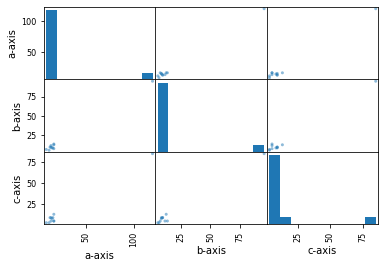

In [5]:
#plot the data
pd.plotting.scatter_matrix(xyz)

## Clustering of data points 

Clustering of data has the same effect as the King Kong effect, usually a bit more muted. in the following example, two clusters of rock sizes are added (big and small). The two clusters induce a large correlation coefficient.

In [6]:
#rock dimensions in cm (add a big rock!)
rock_a = pd.Series([8,16,12,13,16,14,16,11,15,13, 120, 110, 115, 122])
rock_b = pd.Series([7,8,10,12,14,9,13,6,9,10,95, 88, 94, 84])
rock_c = pd.Series([3,5,9,5,5,8,13,3,9,9,85,56, 55, 63])

xyz = pd.DataFrame({'a-axis': rock_a, 'b-axis': rock_b, 'c-axis': rock_c})

#calculate the pearson correlation coefficient
correlation_matrix = xyz.corr()

#print the correlation matrix
correlation_matrix


,a-axis,b-axis,c-axis
a-axis,1.000000,0.994965,0.973624
b-axis,0.994965,1.000000,0.971750
c-axis,0.973624,0.971750,1.000000


array([[<AxesSubplot:xlabel='a-axis', ylabel='a-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='a-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='a-axis'>],
       [<AxesSubplot:xlabel='a-axis', ylabel='b-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='b-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='b-axis'>],
       [<AxesSubplot:xlabel='a-axis', ylabel='c-axis'>,
        <AxesSubplot:xlabel='b-axis', ylabel='c-axis'>,
        <AxesSubplot:xlabel='c-axis', ylabel='c-axis'>]], dtype=object)

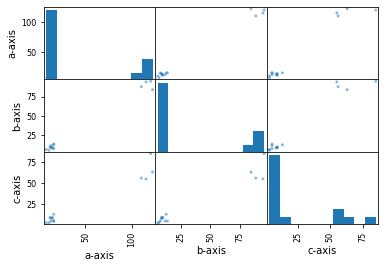

In [7]:
#plot the data
pd.plotting.scatter_matrix(xyz)

## Nonlinear correlation 
Consider a transformation to compare the logarithms of data . This can remove clustering and yield a more meaningful correlation. Here is an example using lahar (debris flow) volume and area inundated by the lahars (from Schilling and others).

In [8]:
# lahar volume (m^3)
lahar_volume = pd.Series([4e9, 1.8e9, 2.5e8,2e8,1.8e8, 1.5e8,1e8, 7.3e7,6.6e7, 5e7, 4e7,4e7, 3e7, 1.6e7, 1.5e7, 1.5e7, 1.4e7, 1.2e7,6e5, 3.8e5, 3.8e5, 3e5, 1.4e5, 8e4, 8e4, 1.7e4, 300, 100, 10])

# area inundated by the lahar (m^2)
lahar_area = pd.Series([5.5e8,1.4e8,6e7,5e7,9e7,7.8e7, 3.4e7, 5.5e7,2.7e7, 2e7, 4.5e6, 3.4e7, 6e6, 1.1e7, 1.6e7, 6e6, 3e6, 1.8e6, 1e6, 7.5e5, 5e5,2e5, 4e5, 4.7e5, 1e5, 1.6e4, 2000, 600, 200])


lahar = pd.DataFrame({'volume': lahar_volume, 'area': lahar_area})
lahar



,volume,area
0,4.000000e+09,550000000.0
1,1.800000e+09,140000000.0
2,2.500000e+08,60000000.0
3,2.000000e+08,50000000.0
4,1.800000e+08,90000000.0
5,1.500000e+08,78000000.0
6,1.000000e+08,34000000.0
7,7.300000e+07,55000000.0
8,6.600000e+07,27000000.0
9,5.000000e+07,20000000.0


<AxesSubplot:title={'center':'See the King Kong Effect!'}, xlabel='Volume (km$^3$)', ylabel='area (m$^2$)'>

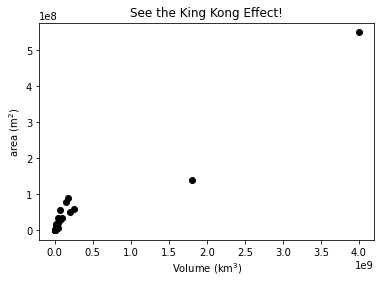

In [9]:
lahar.plot(x="volume", y = "area", style="ko", legend = "", title = "See the King Kong Effect!", xlabel = "Volume (km$^3$)", ylabel="area (m$^2$)")

array([[<AxesSubplot:xlabel='volume', ylabel='volume'>,
        <AxesSubplot:xlabel='area', ylabel='volume'>],
       [<AxesSubplot:xlabel='volume', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>]], dtype=object)

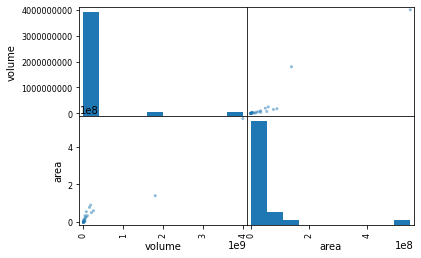

In [10]:
#plot the data - note the "King Kong Effect"
pd.plotting.scatter_matrix(lahar)

### Transforming the data

Sometimes the King Kong effect can be mitigated by data transformation. In the following, the lahar volume and area data are transformed using a logarithm (base 10). Note the change in the data distribution.

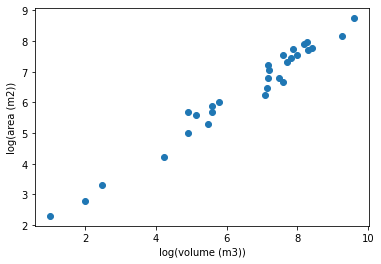

In [11]:
import numpy as np
import matplotlib.pyplot as plt
loglaharvolume = pd.Series(np.log10(lahar['volume']))
loglahararea = pd.Series(np.log10(lahar['area']))

plt.plot(loglaharvolume, loglahararea, "o")
plt.xlabel("log(volume (m3))")
plt.ylabel("log(area (m2))")
plt.show()

In [12]:

laharz = pd.DataFrame({'log_volume': loglaharvolume, 'log_area': loglahararea})

#calculate the pearson correlation coefficient
correlation_matrix = laharz.corr()

#print the correlation matrix
correlation_matrix



,log_volume,log_area
log_volume,1.000000,0.984985
log_area,0.984985,1.000000


## More Applications

Consider data collected on volume and duration of Mauna Loa (HI) eruptions from 1843 to 1984. These data were compiled by Jack Lockwood and colleagues at the USGS. What is the correlation between eruption duration (in days) and estimated lava volume (m$^3$)? What are the pitfalls in making this correlation and how can they be addressed?

In [13]:
# lava volume (m3)
volume = pd.Series([2.20e8, 3.0e7, 3.76e8, 1.16e8, 1.76e8, 1.10e8, 8.7e7, 1.00e8, 1.21e8, 1.83e8, 3.1e7, 5.5e7, 1.21e8, 7.0e7, 3e6, 8.1e7,2.5e7,1.2e7,1.28e8,1.30e8,1.0e7,1e6,8e6,6.30e8,2.0e7,1.23e8,5.0e7,3.83e8,2.80e8,1.82e8,3.5e7,2.5e7,2.02e8])

#eruption duration (days)
duration = pd.Series([22, 1, 23, 145, 13, 134, 40, 17, 14, 38, 12, 48, 15, 61, 1, 16, 3, 7, 280, 6, 1, 1, 1200, 20, 5, 125, 1865, 300, 450, 20, 4, 15, 90])

#year of the eruption
year = pd.Series([1984, 1975, 1950, 1949, 1942, 1940, 1935, 1933, 1926, 1919, 1916, 1914, 1907, 1903, 1903,1899, 1896, 1892, 1887, 1880, 1880, 1879, 1887, 1872, 1871, 1868, 1865, 1859, 1855,1852, 1851, 1849, 1843])

#create the dataframe
mauna_loa = pd.DataFrame({'volume': volume, 'duration': duration})


Concentrated pyroclastic density currents are a major hazard and scientists are concerned with the relationship between run-out of flows and flow volume. Flow volume can be represented as dense rock equivalent or as bulk volume. Here data on concrentrated PDCs compiled by Olivier Roche and colleagues (Geology, 2022, 50 (10): 1172–1176) are provided. What is the correlation between flow volume (km$^3$) and flow run-out (km)? What are the pitfalls in making this correlation and how can they be addressed? Additional data can be found in the excellent supplementary material provided by Roche et al. (2022).

In [14]:
# The estimated run-out of pdc (km)
runout = pd.Series([21, 30, 6, 35, 33, 5.8, 19, 4.9, 28, 14, 33, 7.8, 15, 117, 14.5, 8.6, 6.5, 3.5, 3.2, 25, 10.2, 23, 82, 6, 9, 9])

# The bulk volume of the run-out portion of the pdc (km3) (not DRE)
bulk_volume = pd.Series([171, 385, 0.015, 15, 25, 0.08, 11, 0.01, 48, 3, 14, 0.14, 24, 1231, 5-6, 0.01, 0.05, 0.00037, 0.0004, 35, 0.077, 34, 2885, 0.18, 0.39, 0.2])

#create the dataframe
conc_pdc = pd.DataFrame({'runout': runout, 'volume': bulk_volume})
